In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
headlines = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

In [3]:
headlines.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
headlines

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [5]:
headlines.drop("article_link", axis=1, inplace=True)

In [6]:
headlines.rename(columns={"headline":"text"}, inplace=True)

In [7]:
headlines.head()

,text,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
tweets = pd.read_csv("hf://datasets/nikesh66/Sarcasm-dataset/sarcasm_tweets.csv")

c:\Users\user\.virtualenvs\nlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
tweets.describe

<bound method NDFrame.describe of                                                  Tweet Sarcasm (yes/no)
0                          I genuinely love musicians.               no
1                  I find vegetarians to be wonderful.               no
2       Because artists really make everything better.              yes
3                     Can't wait for more of the game.              yes
4       Oh great, another artists. Just what I needed.              yes
...                                                ...              ...
4995  Because musicians really make everything better.              yes
4996                 Can't wait for more of musicians.               no
4997                I am always excited for this book.               no
4998               I find the concert to be wonderful.               no
4999                     I genuinely love the concert.               no

[5000 rows x 2 columns]>

In [10]:
tweets

,Tweet,Sarcasm (yes/no)
0,I genuinely love musicians.,no
1,I find vegetarians to be wonderful.,no
2,Because artists really make everything better.,yes
3,Can't wait for more of the game.,yes
4,"Oh great, another artists. Just what I needed.",yes
...,...,...
4995,Because musicians really make everything better.,yes
4996,Can't wait for more of musicians.,no
4997,I am always excited for this book.,no
4998,I find the concert to be wonderful.,no


In [11]:
tweets[tweets["Sarcasm (yes/no)"]== "no"]

,Tweet,Sarcasm (yes/no)
0,I genuinely love musicians.,no
1,I find vegetarians to be wonderful.,no
9,I am always excited for the workshop.,no
11,Had a great time with the conference.,no
13,this movie are truly inspiring.,no
...,...,...
4991,artists are genuinely amazing.,no
4996,Can't wait for more of musicians.,no
4997,I am always excited for this book.,no
4998,I find the concert to be wonderful.,no


In [12]:
tweets['is_sarcastic'] = tweets['Sarcasm (yes/no)'].apply(lambda x: 1 if x.strip().lower() == "yes" else 0)

In [13]:
tweets.head()

,Tweet,Sarcasm (yes/no),is_sarcastic
0,I genuinely love musicians.,no,0
1,I find vegetarians to be wonderful.,no,0
2,Because artists really make everything better.,yes,1
3,Can't wait for more of the game.,yes,1
4,"Oh great, another artists. Just what I needed.",yes,1


In [14]:
tweets.drop("Sarcasm (yes/no)", axis=1, inplace=True)

In [15]:
tweets.rename(columns={"Tweet":"text"}, inplace=True)

In [16]:
tweets.head()

,text,is_sarcastic
0,I genuinely love musicians.,0
1,I find vegetarians to be wonderful.,0
2,Because artists really make everything better.,1
3,Can't wait for more of the game.,1
4,"Oh great, another artists. Just what I needed.",1


In [17]:
data = pd.concat([tweets, headlines], ignore_index = True)

In [18]:
data.head()

,text,is_sarcastic
0,I genuinely love musicians.,0
1,I find vegetarians to be wonderful.,0
2,Because artists really make everything better.,1
3,Can't wait for more of the game.,1
4,"Oh great, another artists. Just what I needed.",1


In [19]:
data.describe

<bound method NDFrame.describe of                                                     text  is_sarcastic
0                            I genuinely love musicians.             0
1                    I find vegetarians to be wonderful.             0
2         Because artists really make everything better.             1
3                       Can't wait for more of the game.             1
4         Oh great, another artists. Just what I needed.             1
...                                                  ...           ...
31704               american politics in moral free-fall             0
31705                            america's best 20 hikes             0
31706                              reparations and obama             0
31707  israeli ban targeting boycott supporters raise...             0
31708                  gourmet gifts for the foodie 2014             0

[31709 rows x 2 columns]>

In [20]:
data.isna().sum()

text            0
is_sarcastic    0
dtype: int64

In [21]:
data.duplicated().sum()

4851

In [22]:
data.drop_duplicates(inplace = True)

In [23]:
data.describe

<bound method NDFrame.describe of                                                     text  is_sarcastic
0                            I genuinely love musicians.             0
1                    I find vegetarians to be wonderful.             0
2         Because artists really make everything better.             1
3                       Can't wait for more of the game.             1
4         Oh great, another artists. Just what I needed.             1
...                                                  ...           ...
31704               american politics in moral free-fall             0
31705                            america's best 20 hikes             0
31706                              reparations and obama             0
31707  israeli ban targeting boycott supporters raise...             0
31708                  gourmet gifts for the foodie 2014             0

[26858 rows x 2 columns]>

In [24]:
data['is_sarcastic'].value_counts()

is_sarcastic
0    15079
1    11779
Name: count, dtype: int64

<Axes: xlabel='is_sarcastic'>

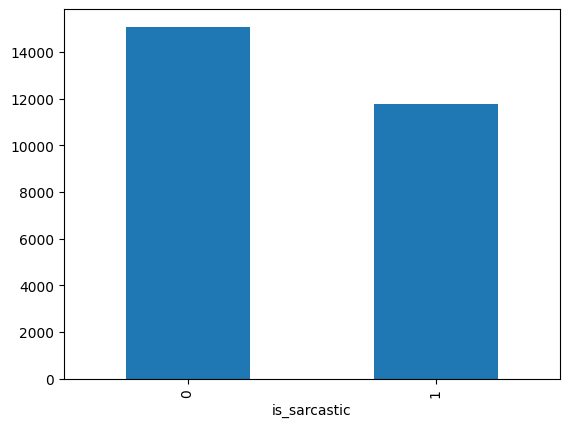

In [25]:
data['is_sarcastic'].value_counts().plot(kind='bar')

# Preprocessing

In [26]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [27]:
def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)      
    
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)


In [28]:
data['text'] = data['text'].apply(preprocess_text)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data['text']
y = data['is_sarcastic']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [32]:
num_words =  10000

In [33]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words,
                                                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  oov_token= '<oov>')

In [34]:
tokenizer.fit_on_texts(X_train)

In [35]:
word_index = tokenizer.word_index

In [36]:
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

In [37]:
vocab_size = len(word_index)
vocab_size

17099

In [38]:

X_train = tokenizer.texts_to_sequences(X_train)

In [39]:
X_test = tokenizer.texts_to_sequences(X_test)

In [40]:
max_len = max([len(s) for s in X_train])
max_len

26

In [41]:
X_train = tf.keras.utils.pad_sequences(X_train, padding='pre', maxlen=max_len)

X_test = tf.keras.utils.pad_sequences(X_test, padding='pre', maxlen=max_len)

## Modelling

In [42]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=80), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=80, activation=tf.nn.tanh)),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=80, activation=tf.nn.elu),  
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])



In [43]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [44]:
lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 26, 80)         │       800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 160)            │       103,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 916,001 (3.49 MB)

 Trainable params: 916,001 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
h = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.6935 - loss: 0.5585 - val_acc: 0.8027 - val_loss: 0.4203
Epoch 2/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.8861 - loss: 0.2864 - val_acc: 0.7908 - val_loss: 0.4573
Epoch 3/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9203 - loss: 0.1989 - val_acc: 0.7807 - val_loss: 0.5189
Epoch 4/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.9514 - loss: 0.1322 - val_acc: 0.7762 - val_loss: 0.5998
Epoch 5/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.9697 - loss: 0.0889 - val_acc: 0.7748 - val_loss: 0.7257


<Axes: title={'center': 'Model Accuracy and Loss Graph'}>

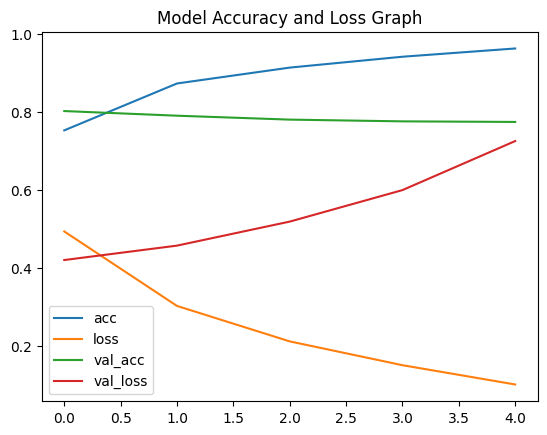

In [46]:
pd.DataFrame(h.history).plot(title='Model Accuracy and Loss Graph')

In [47]:
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)



168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7713 - loss: 0.7310


In [48]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=80),  
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [49]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [50]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 26, 80)         │       800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 24, 64)         │        15,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        76,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,425 (3.40 MB)

 Trainable params: 892,425 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
h = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.6700 - loss: 0.5865 - val_acc: 0.8073 - val_loss: 0.4120
Epoch 2/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8926 - loss: 0.2783 - val_acc: 0.8012 - val_loss: 0.4460
Epoch 3/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9609 - loss: 0.1131 - val_acc: 0.7882 - val_loss: 0.5966
Epoch 4/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9889 - loss: 0.0382 - val_acc: 0.7867 - val_loss: 0.8517
Epoch 5/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9952 - loss: 0.0159 - val_acc: 0.7869 - val_loss: 1.1327


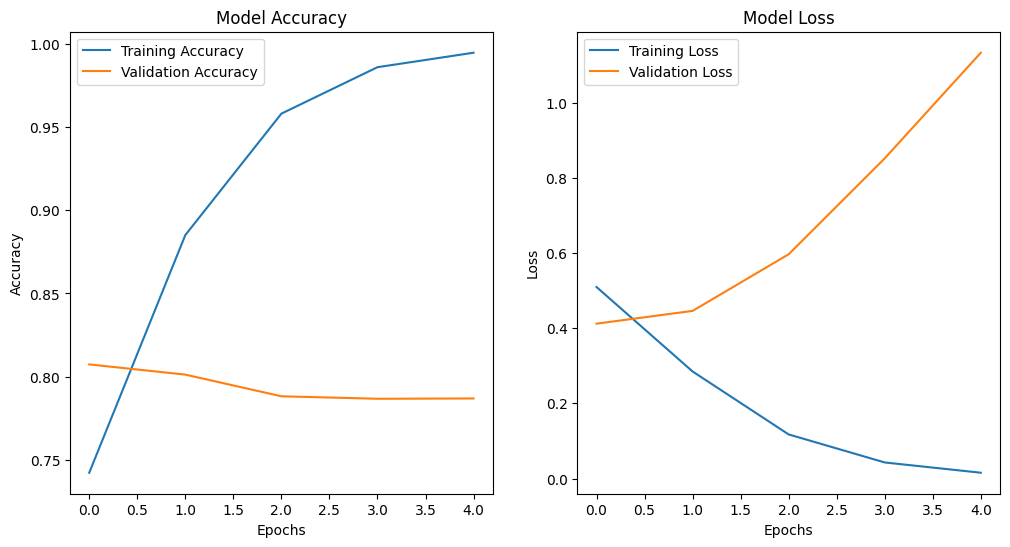

In [52]:
acc = h.history['acc']  
val_acc = h.history['val_acc'] 
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(5)  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(epochs, acc, label='Training Accuracy')
axes[0].plot(epochs, val_acc, label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, label='Training Loss')
axes[1].plot(epochs, val_loss, label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()


In [53]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7789 - loss: 1.1531


In [54]:
print(f'LSTM Accuracy: {lstm_acc}, Loss: {lstm_loss}')
print(f'\nCNN Accuracy: {cnn_acc}, Loss: {cnn_loss}')

LSTM Accuracy: 0.774757981300354, Loss: 0.7256714701652527

CNN Accuracy: 0.7868577837944031, Loss: 1.1326640844345093


# Bart

# Prepare dataset

In [55]:
import datasets

In [56]:
dataset = datasets.load_dataset('csv', data_files='sarcastic_headline_pairs_cleaned_full.csv')

Generating train split: 29970 examples [00:00, 304960.00 examples/s]


In [57]:
dataset

DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 29970
    })
})

In [58]:
# Split the dataset into train and test sets
train_test_split = dataset['train'].train_test_split(test_size=0.2)
train = train_test_split
test = train_test_split

# Display the dataset
print(train)
print(test)


DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 5994
    })
})
DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 5994
    })
})


# Train a tokenizer

In [60]:
from tokenizers import normalizers, pre_tokenizers, Tokenizer, models, trainers

# Build a tokenizer
bpe_tokenizer = Tokenizer(models.BPE())
bpe_tokenizer.normalizer = normalizers.Lowercase()
bpe_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

trainer = trainers.BpeTrainer(
    vocab_size=50265,
    special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"],
    initial_alphabet=pre_tokenizers.ByteLevel.alphabet(),
)

# fine tuning bart

In [61]:
from transformers import AutoTokenizer

en_tokenizer = AutoTokenizer.from_pretrained( "facebook/bart-base" )


def tokenize_dataset(sample):
    input = en_tokenizer(sample['sarcastic'], padding='max_length', max_length=240, truncation=True)
    label = en_tokenizer(sample['non_sarcastic'], padding='max_length', max_length=240, truncation=True)

    input["decoder_input_ids"] = label["input_ids"]
    input["decoder_attention_mask"] = label["attention_mask"]
    input["labels"] = label["input_ids"]

    return input

In [62]:
train_tokenized = train.map(tokenize_dataset, batched=True)
test_tokenized = test.map(tokenize_dataset, batched=True)


Map: 100%|██████████| 23976/23976 [00:03<00:00, 6123.69 examples/s]


In [63]:
train_tokenized

DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic', 'input_ids', 'attention_mask', 'decoder_input_ids', 'decoder_attention_mask', 'labels'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic', 'input_ids', 'attention_mask', 'decoder_input_ids', 'decoder_attention_mask', 'labels'],
        num_rows: 5994
    })
})

In [64]:
from transformers import BartForConditionalGeneration
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

training_args = Seq2SeqTrainingArguments(
    output_dir="./",
    evaluation_strategy="steps",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    predict_with_generate=True,
    logging_steps=2,  # set to 1000 for full training
    save_steps=64,  # set to 500 for full training
    eval_steps=64,  # set to 8000 for full training
    warmup_steps=1,  # set to 2000 for full training
    max_steps=128, # delete for full training
    overwrite_output_dir=True,
    save_total_limit=3,
    fp16=False, # True if GPU
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized['train'],
    eval_dataset=test_tokenized['test'],
)


trainer.train()

c:\Users\user\.virtualenvs\nlp\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
  2%|▏         | 3/128 [00:01<00:43,  2.88it/s]

{'loss': 15.5437, 'grad_norm': 129.9005584716797, 'learning_rate': 4.960629921259843e-05, 'epoch': 0.0}


  5%|▍         | 6/128 [00:01<00:21,  5.59it/s]

{'loss': 13.598, 'grad_norm': 27.3619327545166, 'learning_rate': 4.881889763779528e-05, 'epoch': 0.0}


  5%|▌         | 7/128 [00:01<00:20,  6.04it/s]

{'loss': 12.4065, 'grad_norm': 25.244672775268555, 'learning_rate': 4.8031496062992124e-05, 'epoch': 0.0}


  7%|▋         | 9/128 [00:02<00:17,  6.89it/s]

{'loss': 11.5487, 'grad_norm': 24.283742904663086, 'learning_rate': 4.724409448818898e-05, 'epoch': 0.0}


  9%|▊         | 11/128 [00:02<00:15,  7.34it/s]

{'loss': 10.8602, 'grad_norm': 30.211322784423828, 'learning_rate': 4.645669291338583e-05, 'epoch': 0.0}


 10%|█         | 13/128 [00:02<00:15,  7.55it/s]

{'loss': 10.2054, 'grad_norm': 34.641536712646484, 'learning_rate': 4.566929133858268e-05, 'epoch': 0.0}


 12%|█▏        | 15/128 [00:02<00:16,  6.96it/s]

{'loss': 9.314, 'grad_norm': 41.54974365234375, 'learning_rate': 4.488188976377953e-05, 'epoch': 0.0}


 13%|█▎        | 17/128 [00:03<00:15,  7.36it/s]

{'loss': 8.7812, 'grad_norm': 59.534297943115234, 'learning_rate': 4.409448818897638e-05, 'epoch': 0.0}


 15%|█▍        | 19/128 [00:03<00:14,  7.42it/s]

{'loss': 7.89, 'grad_norm': 52.30660629272461, 'learning_rate': 4.330708661417323e-05, 'epoch': 0.0}


 16%|█▋        | 21/128 [00:03<00:15,  6.92it/s]

{'loss': 7.0713, 'grad_norm': 53.564048767089844, 'learning_rate': 4.251968503937008e-05, 'epoch': 0.0}


 18%|█▊        | 23/128 [00:04<00:14,  7.07it/s]

{'loss': 6.4383, 'grad_norm': 55.199581146240234, 'learning_rate': 4.173228346456693e-05, 'epoch': 0.0}


 20%|█▉        | 25/128 [00:04<00:14,  6.93it/s]

{'loss': 5.8392, 'grad_norm': 58.361000061035156, 'learning_rate': 4.0944881889763784e-05, 'epoch': 0.0}


 21%|██        | 27/128 [00:04<00:13,  7.29it/s]

{'loss': 5.4996, 'grad_norm': 49.796875, 'learning_rate': 4.015748031496063e-05, 'epoch': 0.0}


 23%|██▎       | 29/128 [00:04<00:13,  7.46it/s]

{'loss': 5.1451, 'grad_norm': 51.48362731933594, 'learning_rate': 3.9370078740157485e-05, 'epoch': 0.0}


 24%|██▍       | 31/128 [00:05<00:13,  7.43it/s]

{'loss': 5.0192, 'grad_norm': 51.80958938598633, 'learning_rate': 3.858267716535433e-05, 'epoch': 0.0}


 26%|██▌       | 33/128 [00:05<00:12,  7.58it/s]

{'loss': 4.592, 'grad_norm': 50.971893310546875, 'learning_rate': 3.779527559055118e-05, 'epoch': 0.0}


 27%|██▋       | 35/128 [00:05<00:12,  7.53it/s]

{'loss': 4.4863, 'grad_norm': 52.628196716308594, 'learning_rate': 3.7007874015748034e-05, 'epoch': 0.0}


 29%|██▉       | 37/128 [00:05<00:11,  7.59it/s]

{'loss': 4.2417, 'grad_norm': 50.72754669189453, 'learning_rate': 3.622047244094489e-05, 'epoch': 0.0}


 30%|███       | 39/128 [00:06<00:11,  7.63it/s]

{'loss': 4.0269, 'grad_norm': 50.11092758178711, 'learning_rate': 3.5433070866141735e-05, 'epoch': 0.0}


 32%|███▏      | 41/128 [00:06<00:11,  7.53it/s]

{'loss': 4.6309, 'grad_norm': 49.65699005126953, 'learning_rate': 3.464566929133858e-05, 'epoch': 0.0}


 34%|███▎      | 43/128 [00:06<00:10,  7.85it/s]

{'loss': 3.6246, 'grad_norm': 48.89006805419922, 'learning_rate': 3.385826771653544e-05, 'epoch': 0.0}


 35%|███▌      | 45/128 [00:06<00:10,  7.99it/s]

{'loss': 3.4443, 'grad_norm': 49.96120071411133, 'learning_rate': 3.3070866141732284e-05, 'epoch': 0.0}


 37%|███▋      | 47/128 [00:07<00:10,  7.87it/s]

{'loss': 3.3296, 'grad_norm': 48.914310455322266, 'learning_rate': 3.228346456692913e-05, 'epoch': 0.0}


 38%|███▊      | 49/128 [00:07<00:10,  7.43it/s]

{'loss': 3.1648, 'grad_norm': 48.00950622558594, 'learning_rate': 3.1496062992125985e-05, 'epoch': 0.0}


 40%|███▉      | 51/128 [00:07<00:10,  7.63it/s]

{'loss': 2.9904, 'grad_norm': 48.53311538696289, 'learning_rate': 3.070866141732284e-05, 'epoch': 0.0}


 41%|████▏     | 53/128 [00:07<00:09,  7.77it/s]

{'loss': 2.8902, 'grad_norm': 46.99649429321289, 'learning_rate': 2.992125984251969e-05, 'epoch': 0.0}


 43%|████▎     | 55/128 [00:08<00:09,  7.85it/s]

{'loss': 2.6518, 'grad_norm': 46.970584869384766, 'learning_rate': 2.9133858267716534e-05, 'epoch': 0.0}


 45%|████▍     | 57/128 [00:08<00:09,  7.61it/s]

{'loss': 2.706, 'grad_norm': 45.08476257324219, 'learning_rate': 2.8346456692913388e-05, 'epoch': 0.0}


 46%|████▌     | 59/128 [00:08<00:09,  7.47it/s]

{'loss': 2.4562, 'grad_norm': 44.45286560058594, 'learning_rate': 2.755905511811024e-05, 'epoch': 0.0}


 48%|████▊     | 61/128 [00:09<00:09,  7.44it/s]

{'loss': 2.2666, 'grad_norm': 44.801734924316406, 'learning_rate': 2.677165354330709e-05, 'epoch': 0.01}


 49%|████▉     | 63/128 [00:09<00:08,  7.52it/s]

{'loss': 2.211, 'grad_norm': 43.041221618652344, 'learning_rate': 2.5984251968503937e-05, 'epoch': 0.01}


 50%|█████     | 64/128 [00:09<00:08,  7.60it/s]

{'loss': 2.2289, 'grad_norm': 40.769447326660156, 'learning_rate': 2.5196850393700788e-05, 'epoch': 0.01}


                                                
 50%|█████     | 64/128 [01:19<00:08,  7.60it/s]   c:\Users\user\.virtualenvs\nlp\Lib\site-packages\transformers\modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


{'eval_loss': 1.519106388092041, 'eval_runtime': 70.3088, 'eval_samples_per_second': 85.252, 'eval_steps_per_second': 42.626, 'epoch': 0.01}


 52%|█████▏    | 67/128 [01:23<11:12, 11.02s/it]

{'loss': 2.0206, 'grad_norm': 40.9712028503418, 'learning_rate': 2.440944881889764e-05, 'epoch': 0.01}


 54%|█████▍    | 69/128 [01:24<05:22,  5.46s/it]

{'loss': 1.8823, 'grad_norm': 40.30274963378906, 'learning_rate': 2.362204724409449e-05, 'epoch': 0.01}


 55%|█████▌    | 71/128 [01:24<02:36,  2.75s/it]

{'loss': 1.7597, 'grad_norm': 39.03014373779297, 'learning_rate': 2.283464566929134e-05, 'epoch': 0.01}


 58%|█████▊    | 74/128 [01:24<00:55,  1.02s/it]

{'loss': 1.8517, 'grad_norm': 36.92668533325195, 'learning_rate': 2.204724409448819e-05, 'epoch': 0.01}


 59%|█████▊    | 75/128 [01:24<00:39,  1.33it/s]

{'loss': 1.642, 'grad_norm': 36.358558654785156, 'learning_rate': 2.125984251968504e-05, 'epoch': 0.01}


 60%|██████    | 77/128 [01:25<00:21,  2.33it/s]

{'loss': 1.5762, 'grad_norm': 34.31708908081055, 'learning_rate': 2.0472440944881892e-05, 'epoch': 0.01}


 62%|██████▎   | 80/128 [01:25<00:11,  4.31it/s]

{'loss': 1.4838, 'grad_norm': 33.9364128112793, 'learning_rate': 1.9685039370078743e-05, 'epoch': 0.01}


 63%|██████▎   | 81/128 [01:25<00:09,  4.95it/s]

{'loss': 1.3735, 'grad_norm': 32.171958923339844, 'learning_rate': 1.889763779527559e-05, 'epoch': 0.01}


 66%|██████▌   | 84/128 [01:26<00:06,  6.55it/s]

{'loss': 1.3407, 'grad_norm': 31.85838508605957, 'learning_rate': 1.8110236220472444e-05, 'epoch': 0.01}


 66%|██████▋   | 85/128 [01:26<00:06,  6.72it/s]

{'loss': 1.3155, 'grad_norm': 58.452613830566406, 'learning_rate': 1.732283464566929e-05, 'epoch': 0.01}


 68%|██████▊   | 87/128 [01:26<00:05,  7.36it/s]

{'loss': 1.1156, 'grad_norm': 29.6612491607666, 'learning_rate': 1.6535433070866142e-05, 'epoch': 0.01}


 70%|██████▉   | 89/128 [01:26<00:05,  7.25it/s]

{'loss': 1.1562, 'grad_norm': 28.212352752685547, 'learning_rate': 1.5748031496062993e-05, 'epoch': 0.01}


 71%|███████   | 91/128 [01:27<00:05,  7.01it/s]

{'loss': 1.0539, 'grad_norm': 27.741655349731445, 'learning_rate': 1.4960629921259845e-05, 'epoch': 0.01}


 73%|███████▎  | 93/128 [01:27<00:04,  7.41it/s]

{'loss': 0.9844, 'grad_norm': 27.056278228759766, 'learning_rate': 1.4173228346456694e-05, 'epoch': 0.01}


 74%|███████▍  | 95/128 [01:27<00:04,  7.64it/s]

{'loss': 1.0113, 'grad_norm': 25.812950134277344, 'learning_rate': 1.3385826771653545e-05, 'epoch': 0.01}


 76%|███████▌  | 97/128 [01:27<00:04,  7.65it/s]

{'loss': 1.0842, 'grad_norm': 23.86285972595215, 'learning_rate': 1.2598425196850394e-05, 'epoch': 0.01}


 77%|███████▋  | 99/128 [01:28<00:04,  7.20it/s]

{'loss': 0.9849, 'grad_norm': 24.316219329833984, 'learning_rate': 1.1811023622047245e-05, 'epoch': 0.01}


 79%|███████▉  | 101/128 [01:28<00:03,  7.55it/s]

{'loss': 0.9424, 'grad_norm': 23.080610275268555, 'learning_rate': 1.1023622047244095e-05, 'epoch': 0.01}


 80%|████████  | 103/128 [01:28<00:03,  7.59it/s]

{'loss': 1.0256, 'grad_norm': 21.83289337158203, 'learning_rate': 1.0236220472440946e-05, 'epoch': 0.01}


 82%|████████▏ | 105/128 [01:28<00:03,  7.13it/s]

{'loss': 0.8133, 'grad_norm': 21.650367736816406, 'learning_rate': 9.448818897637795e-06, 'epoch': 0.01}


 84%|████████▎ | 107/128 [01:29<00:02,  7.29it/s]

{'loss': 1.0765, 'grad_norm': 21.37291717529297, 'learning_rate': 8.661417322834646e-06, 'epoch': 0.01}


 85%|████████▌ | 109/128 [01:29<00:02,  7.40it/s]

{'loss': 0.8406, 'grad_norm': 20.097246170043945, 'learning_rate': 7.874015748031496e-06, 'epoch': 0.01}


 87%|████████▋ | 111/128 [01:29<00:02,  7.38it/s]

{'loss': 0.9114, 'grad_norm': 19.723987579345703, 'learning_rate': 7.086614173228347e-06, 'epoch': 0.01}


 88%|████████▊ | 113/128 [01:29<00:02,  7.05it/s]

{'loss': 0.7481, 'grad_norm': 19.823780059814453, 'learning_rate': 6.299212598425197e-06, 'epoch': 0.01}


 90%|████████▉ | 115/128 [01:30<00:01,  7.19it/s]

{'loss': 1.1889, 'grad_norm': 122.89593505859375, 'learning_rate': 5.511811023622048e-06, 'epoch': 0.01}


 91%|█████████▏| 117/128 [01:30<00:01,  7.24it/s]

{'loss': 0.8791, 'grad_norm': 19.5128116607666, 'learning_rate': 4.7244094488188975e-06, 'epoch': 0.01}


 93%|█████████▎| 119/128 [01:30<00:01,  7.32it/s]

{'loss': 0.8869, 'grad_norm': 18.649938583374023, 'learning_rate': 3.937007874015748e-06, 'epoch': 0.01}


 95%|█████████▍| 121/128 [01:31<00:00,  7.22it/s]

{'loss': 0.8546, 'grad_norm': 17.435598373413086, 'learning_rate': 3.1496062992125985e-06, 'epoch': 0.01}


 96%|█████████▌| 123/128 [01:31<00:00,  7.35it/s]

{'loss': 0.8872, 'grad_norm': 16.94398307800293, 'learning_rate': 2.3622047244094487e-06, 'epoch': 0.01}


 98%|█████████▊| 125/128 [01:31<00:00,  7.36it/s]

{'loss': 0.8348, 'grad_norm': 16.76565933227539, 'learning_rate': 1.5748031496062992e-06, 'epoch': 0.01}


 99%|█████████▉| 127/128 [01:31<00:00,  7.38it/s]

{'loss': 0.7949, 'grad_norm': 17.575578689575195, 'learning_rate': 7.874015748031496e-07, 'epoch': 0.01}


100%|██████████| 128/128 [01:32<00:00,  7.39it/s]

{'loss': 0.7913, 'grad_norm': 17.811050415039062, 'learning_rate': 0.0, 'epoch': 0.01}


                                                 
100%|██████████| 128/128 [02:44<00:00,  7.39it/s]  

{'eval_loss': 0.5615523457527161, 'eval_runtime': 71.8859, 'eval_samples_per_second': 83.382, 'eval_steps_per_second': 41.691, 'epoch': 0.01}


100%|██████████| 128/128 [02:47<00:00,  1.31s/it]

{'train_runtime': 167.4262, 'train_samples_per_second': 1.529, 'train_steps_per_second': 0.765, 'train_loss': 3.5658541712909937, 'epoch': 0.01}


TrainOutput(global_step=128, training_loss=3.5658541712909937, metrics={'train_runtime': 167.4262, 'train_samples_per_second': 1.529, 'train_steps_per_second': 0.765, 'total_flos': 36584187494400.0, 'train_loss': 3.5658541712909937, 'epoch': 0.010677344010677344})

In [65]:
trainer.save_model("./sarcasm_model")

In [66]:
model = BartForConditionalGeneration.from_pretrained("./sarcasm_model")

In [67]:
def generate_sarcastic(text):
    input_ids = en_tokenizer(
        text,
        return_tensors="pt",  
        padding="max_length",
        max_length=120,
        truncation=True
    )["input_ids"]

    output_ids = model.generate(
        input_ids=input_ids,
        max_length=120,  
        num_beams=5,  
        early_stopping=True,  
        no_repeat_ngram_size=1,

        
    )

    sarcastic_text = en_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return sarcastic_text

In [68]:
text = "it was funny"
sarcastic_text = generate_sarcastic(text)
print(f"Non-sarcastic text: {text}")
print(f"\n Sarcastic text: {sarcastic_text}")

Non-sarcastic text: it was funny

 Sarcastic text: and they knew he was in need of help to get them through the ailing his back and over into more normal life lives with at least one major central bank franchise record interest equal "over" separate from those that had been left behind after losing their jobs or even just about all but completely under-inflated, without ever reaching 100 percent confidence level equivalent weight gain control up there as well) finally decided she could not handle carrying around enough energy needs issues like this while still holding firm against her own health care bill debt service calls call m/s r hav ­ 
